# Logistic Regression (using Python from scratch)


### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# using sklearn to produce fake data
import sklearn

### creating Data

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)

# m = number of samples
m = 200

### visualizing the Data

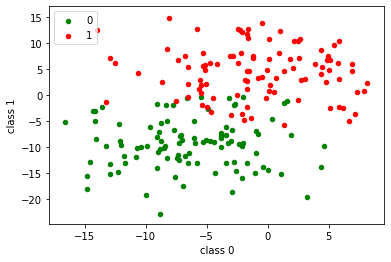

In [11]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'green', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('class 0')
plt.ylabel('class 1')
plt.show()

### Sigmoid / Logistic Function

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Hypothesis Function

In [13]:
def h(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

### Cost Function

In [14]:
def cost(w,X,Y):
    y_pred = h(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

### Gradient value

In [15]:
def grad(w,X,Y):
    y_pred = h(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

### Gradient Descent

In [16]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while (True):
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1

### Training Model

In [22]:
w = [1,1,1]
w = descent(w,w,.001)

[1, 1, 1]
126.96627984087802
[1.0256507363493803, 0.8433059571632547, 1.0186194758550315]
103.34270021208206
[1.0488519583686278, 0.7081232985130347, 1.0203864425775506]
85.70997969902052
[1.0702314739021757, 0.5910476505100697, 1.0120425693960176]
72.65861172430212
[1.089695196342591, 0.4954364169918856, 0.9939712303848353]
63.65202776400884
[1.1075236546680451, 0.41844672606715994, 0.9687451015750871]
57.25982832431129
[1.1241003321863088, 0.35520883847126705, 0.939347434307211]
52.42801324133925
[1.1396567847663102, 0.30247629512012725, 0.9077139991174835]
48.61939210679552
[1.1543083208365559, 0.25834168708816835, 0.8750803693219011]
45.55677755806364
[1.1681084571189289, 0.2216654835448402, 0.8423077411384631]
43.080733625766584
[1.1810843832777795, 0.19170619665514393, 0.8100448888388065]
41.084261124745154
[1.1932587603011962, 0.16788359589497392, 0.7788001857554457]
39.48276840627426
[1.2046626151383935, 0.14962344841141856, 0.7489697756457413]
38.20196253705007
[1.215341115258

### Final parameters

In [23]:
print(w)

[1.6522646171097335, 0.16190978845799098, 0.5285522283884461]


### Visualizing the Result

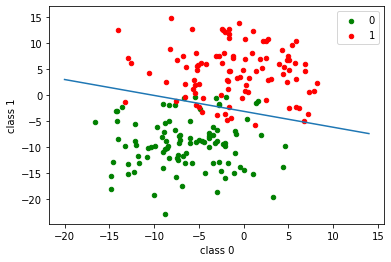

In [24]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def f(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'green', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(f, range(-20,15))
plt.xlabel('class 0')
plt.ylabel('class 1')
plt.show()